In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv", index_col="id")
test = pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv", index_col="id")

In [3]:
sub_index = test.index

In [4]:
train.loc[train['class']=='p']=1
train.loc[train['class']=='e']=0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 523.2+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2077964 entries, 3116945 to 5194908
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             object 
 11  stem-surface          object 
 12  stem-color            object 
 13  veil-type             object 
 14  veil-color            object 
 15  has-ring              object 
 16  ring-type             object 
 17  spore-print-color     object 
 18  habitat               object 
 19  season                object 
dtypes: float64(3), object(17)
memory usage: 332.9+ MB


In [7]:
test.isnull().sum()

cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

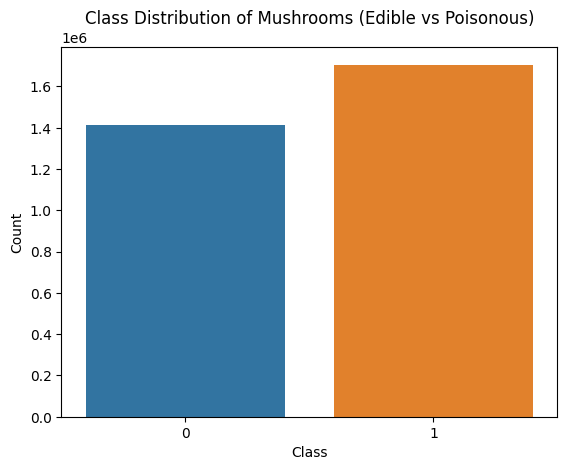

In [8]:
sns.countplot(x='class', data=train)
plt.title('Class Distribution of Mushrooms (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [9]:
y_actual = train['class']
train = train.drop('class', axis = 1)

In [10]:
train.head(2)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,1,1,1,1,1,1,1.0,1.0,1,1,1,1,1,1,1,1,1,1


In [11]:
missing = train.isnull().sum()
missing_percentage = missing/len(train)*100
total_unique_values = train[pd.notnull(train)].nunique()
missing_info = pd.DataFrame({
    'Class':train.columns,
    'Total_missing':missing,
    'Missing_percentage': missing_percentage,
    'Unique_features_not_null':total_unique_values
})
missing_info

,Class,Total_missing,Missing_percentage,Unique_features_not_null
cap-diameter,cap-diameter,0,0.0,2
cap-shape,cap-shape,0,0.0,2
cap-surface,cap-surface,0,0.0,2
cap-color,cap-color,0,0.0,2
does-bruise-or-bleed,does-bruise-or-bleed,0,0.0,2
gill-attachment,gill-attachment,0,0.0,2
gill-spacing,gill-spacing,0,0.0,2
gill-color,gill-color,0,0.0,2
stem-height,stem-height,0,0.0,2
stem-width,stem-width,0,0.0,2


In [12]:
missing = test.isnull().sum()
missing_percentage = missing/len(test)*100
total_unique_values = test[pd.notnull(test)].nunique()
test_missing_info = pd.DataFrame({
    'Class':test.columns,
    'Total_missing':missing,
    'Missing_percentage': missing_percentage,
    'Unique_features_not_null':total_unique_values
})
test_missing_info

,Class,Total_missing,Missing_percentage,Unique_features_not_null
cap-diameter,cap-diameter,7,0.000337,3745
cap-shape,cap-shape,31,0.001492,62
cap-surface,cap-surface,446904,21.506821,59
cap-color,cap-color,13,0.000626,57
does-bruise-or-bleed,does-bruise-or-bleed,10,0.000481,22
gill-attachment,gill-attachment,349821,16.834796,66
gill-spacing,gill-spacing,839595,40.404694,35
gill-color,gill-color,49,0.002358,56
stem-height,stem-height,1,0.000048,2664
stem-width,stem-width,0,0.000000,5610


In [13]:
df1 = missing_info.assign(data = 'train')
df2 = test_missing_info.assign(data = 'test')
df = pd.concat([df1, df2], axis = 1)
df

,Class,Total_missing,Missing_percentage,Unique_features_not_null,data,Class,Total_missing,Missing_percentage,Unique_features_not_null,data
cap-diameter,cap-diameter,0,0.0,2,train,cap-diameter,7,0.000337,3745,test
cap-shape,cap-shape,0,0.0,2,train,cap-shape,31,0.001492,62,test
cap-surface,cap-surface,0,0.0,2,train,cap-surface,446904,21.506821,59,test
cap-color,cap-color,0,0.0,2,train,cap-color,13,0.000626,57,test
does-bruise-or-bleed,does-bruise-or-bleed,0,0.0,2,train,does-bruise-or-bleed,10,0.000481,22,test
gill-attachment,gill-attachment,0,0.0,2,train,gill-attachment,349821,16.834796,66,test
gill-spacing,gill-spacing,0,0.0,2,train,gill-spacing,839595,40.404694,35,test
gill-color,gill-color,0,0.0,2,train,gill-color,49,0.002358,56,test
stem-height,stem-height,0,0.0,2,train,stem-height,1,0.000048,2664,test
stem-width,stem-width,0,0.0,2,train,stem-width,0,0.000000,5610,test


In [14]:
def large_missing_handler(df , df1, threshold):
    indexes = df1.loc[df1['Missing_percentage']>4].index
    df[indexes] = df[indexes].fillna("Null")
    return df
train = large_missing_handler(train , missing_info, 4)
test = large_missing_handler(test ,test_missing_info, 4)

In [15]:
categorical_cols = train.select_dtypes('object').columns
numerical_columns  = train.select_dtypes('float64').columns
for col in categorical_cols:
    mode = train[col].mode()[0]
    train.loc[train[col].isnull()]= mode
    test.loc[test[col].isnull()]= mode
    
for col in numerical_columns:
    median = train[col].median()
    train.loc[train[col].isnull()]= median
    test.loc[test[col].isnull()]= median

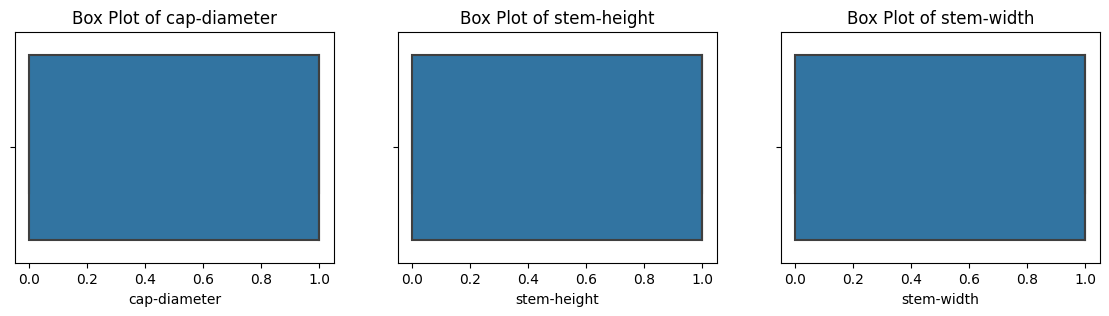

In [16]:
plt.figure(figsize=(14,3))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(x=train[column])
    plt.title(f'Box Plot of {column}')
plt.show()

In [17]:
for i in numerical_columns:
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3 - Q1
    median_to_impute = train[((train[i]>=Q1-1.5*IQR ) | (train[i]<=Q3+1.5*IQR ))][i].median()
    train.loc[((train[i]<Q1-1.5*IQR ) | (train[i]>Q3+1.5*IQR )),i] = median_to_impute
    median_to_impute = test[((test[i]>=Q1-1.5*IQR ) | (test[i]<=Q3+1.5*IQR ))][i].median()
    test.loc[((test[i]<Q1-1.5*IQR ) | (test[i]>Q3+1.5*IQR )),i] = median_to_impute
    
    

In [18]:
def rare_encoding(df, threshold=0.01):
    for column in df.select_dtypes(include='object').columns:
        if column in df.columns:
            freq = df[column].value_counts(normalize=True)
            rare_classes = freq.index[freq < threshold]
            df[column] = df[column].where(~df[column].isin(rare_classes), 'Rare')
    return df


train = rare_encoding(train)
test  = rare_encoding(test)

common_cols = train.columns.intersection(test.columns)
train = train[common_cols]
test = test[common_cols]

In [19]:
def encode_categorical(df, target_column=None, max_unique_classes=10):
    for column in df.select_dtypes(include='object').columns:
        unique_classes = df[column].nunique()
        if unique_classes <= max_unique_classes:
            df = pd.get_dummies(df, columns=[column], drop_first=True)
        else:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df


train = encode_categorical(train)
test = encode_categorical(test)

common_cols = train.columns.intersection(test.columns)
train = train[common_cols]
test = test[common_cols]

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(train)
X_test = imputer.transform(test)


In [21]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
)

In [22]:
import numpy as np
y_actual = np.asarray(y_actual)
X_train = np.asarray(X_train)

In [23]:
xgb_model.fit(X_train, y_actual)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [24]:
a = xgb_model.predict(np.asarray(X_test))

In [25]:
l = ['p' if(i==1) else 'e' for i in a ]

In [26]:
l

['p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'e',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'e',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'e',
 'p',
 'e',
 'e',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p'

In [27]:
submission = pd.DataFrame({
    'id':sub_index,
    'class':l
})

In [28]:
submission.to_csv('ans.csv', index = False)